In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pydataset import data

We're going to work with some pre-defined data sets originally used in R:

In [2]:
datasets = data()
print(datasets)

        dataset_id                                             title
0    AirPassengers       Monthly Airline Passenger Numbers 1949-1960
1          BJsales                 Sales Data with Leading Indicator
2              BOD                         Biochemical Oxygen Demand
3     Formaldehyde                     Determination of Formaldehyde
4     HairEyeColor         Hair and Eye Color of Statistics Students
..             ...                                               ...
752        VerbAgg                  Verbal Aggression item responses
753           cake                 Breakage Angle of Chocolate Cakes
754           cbpp                 Contagious bovine pleuropneumonia
755    grouseticks  Data on red grouse ticks from Elston et al. 2001
756     sleepstudy       Reaction times in a sleep deprivation study

[757 rows x 2 columns]


We'll use the 'quakes' dataset, what is it?  Read the documentation to find out:

In [3]:
data('quakes', show_doc=True)
df = data('quakes')

quakes

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Locations of Earthquakes off Fiji

### Description

The data set give the locations of 1000 seismic events of MB > 4.0. The events
occurred in a cube near Fiji since 1964.

### Usage

    quakes

### Format

A data frame with 1000 observations on 5 variables.

[,1]

lat

numeric

Latitude of event

[,2]

long

numeric

Longitude

[,3]

depth

numeric

Depth (km)

[,4]

mag

numeric

Richter Magnitude

[,5]

stations

numeric

Number of stations reporting

### Details

There are two clear planes of seismic activity. One is a major plate junction;
the other is the Tonga trench off New Zealand. These data constitute a
subsample from a larger dataset of containing 5000 observations.

### Source

This is one of the Harvard PRIM-H project data sets. They in turn obtained it
from Dr. John Woodhouse, Dept. of Geophysics, Harvard University.

### Examples

    require(graphics)
    pairs(quakes, 

In [4]:
print(df)

        lat    long  depth  mag  stations
1    -20.42  181.62    562  4.8        41
2    -20.62  181.03    650  4.2        15
3    -26.00  184.10     42  5.4        43
4    -17.97  181.66    626  4.1        19
5    -20.42  181.96    649  4.0        11
...     ...     ...    ...  ...       ...
996  -25.93  179.54    470  4.4        22
997  -12.28  167.06    248  4.7        35
998  -20.13  184.20    244  4.5        34
999  -17.40  187.80     40  4.5        14
1000 -21.59  170.56    165  6.0       119

[1000 rows x 5 columns]


**Make a scatter plot of the latitudes and longitudes of the earthquakes**

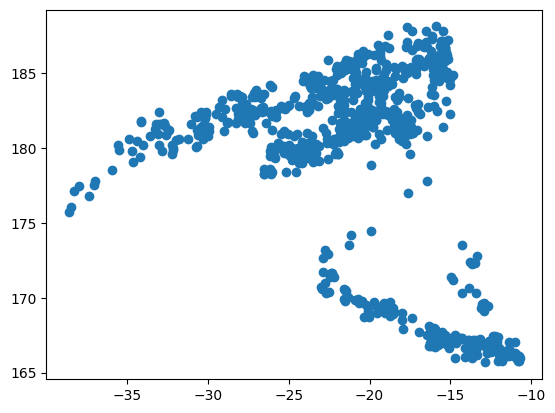

In [5]:
plt.scatter(df['lat'],df['long'])

In [6]:
mag = df['mag']
scale = []
min_mag = np.min(mag)
max_mag = np.max(mag)
for i in mag:
    scale.append(20*(i-min_mag)/(max_mag-min_mag))

**Now make another scatter plot showing the latitudes and longitudes, but with the marker size representing the magnitude and the colour representing the depth**  Hint - scale the magnitudes to 20*(mag - min_mag)/(max_mag-min_mag)

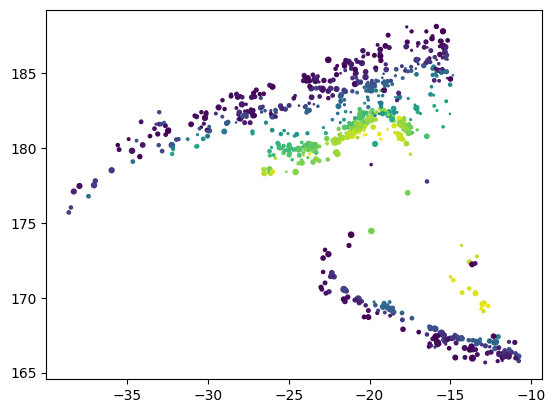

In [7]:
plt.scatter(df['lat'],df['long'],s=scale,c=df['depth'])

What can you say about the depths of the earthquakes?

**Now use the KMeans algorithm from scikit learn to cluster the eartquake locations according to their latitude and longitude.  How many clusters are appropriate?  Hint - look at the documentation for the dataset!**

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
latlong = df[['lat','long']].to_numpy()

In [9]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(latlong)

**Make a scatter plot showing the cluster each earthquake belongs to**

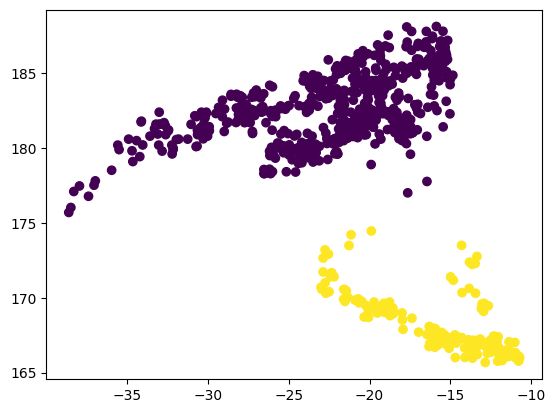

In [10]:
plt.scatter(df['lat'],df['long'],c=kmeans.predict(latlong))

**Now perform KMeans clustering on the latitude, longitude and depth without scaling the inputs.  Plot the resulting clusters.  What do you notice?**

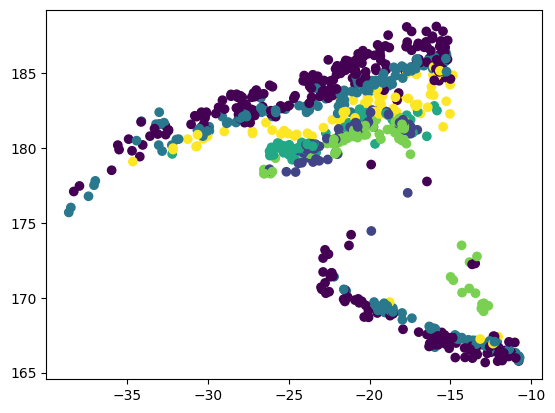

In [11]:
latlongdepth = df[['lat','long','depth']].to_numpy()
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(latlongdepth)
plt.scatter(df['lat'],df['long'],c=kmeans.predict(latlongdepth))

In [12]:
?normalize

**Now perform clustering on the same three variables but this time normalize them (tip - use normalize from sklearn.preprocessing with axis=0).  Plot your results as lat vs long, long vs depth and lat vs depth.  What do you notice?**

In [13]:
a = normalize(latlongdepth,axis=0)
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(a)

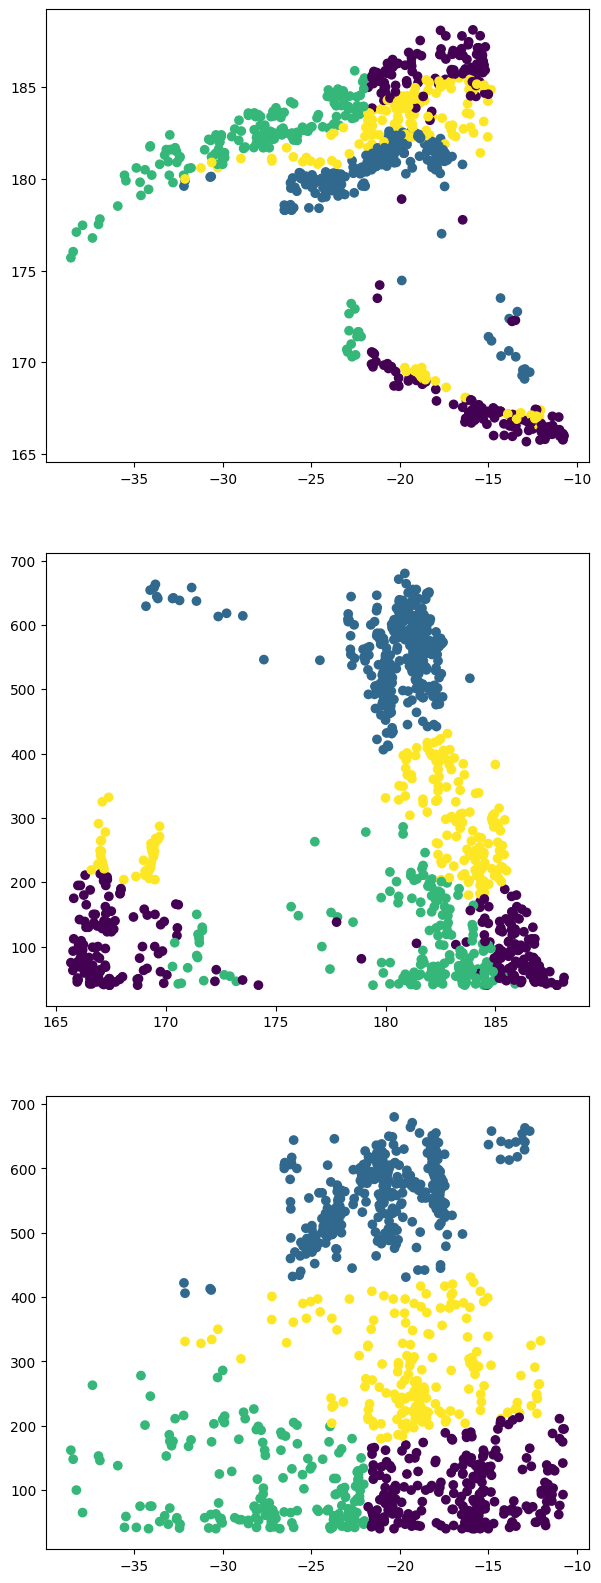

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(7,20))
axes[0].scatter(df['lat'],df['long'],c=kmeans.predict(a))
axes[1].scatter(df['long'],df['depth'],c=kmeans.predict(a))
axes[2].scatter(df['lat'],df['depth'],c=kmeans.predict(a))
# don't use yellow, hard to see in presentations. for future reference

**Now make a scatter plot of the magnitutes against the number of stations.  Is there a correlation?  Does this make sense?**

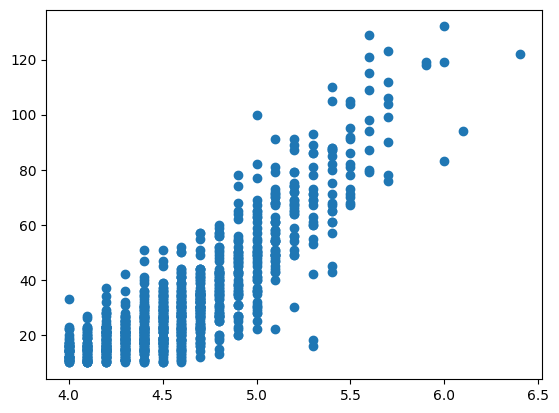

In [15]:
plt.scatter(df['mag'],df['stations'])

**Now use a neural network with a linear output to predict the number of stations given an earthquake magnitude.  Hint - we did similar things in weeks 2 and 3!  Plot your results and the training history.**

In [16]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

2023-03-21 12:09:00.669591: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-21 12:09:00.745450: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/anaconda3/envs/tf2.11/lib::/usr/lib/nvidia:/usr/local/cuda/lib64
2023-03-21 12:09:00.745462: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [24]:
df = df[['mag','stations']]
df = shuffle(df)
mags = df['mag'].to_numpy()
stations = df['stations'].to_numpy()
mags_train,mags_test,stat_train,stat_test = train_test_split(mags,stations,test_size=0.1)
print(len(mags_train))
print(len(stat_train))

900
900


In [28]:
#
# Training configuration
#
BatchSize       = 200
Nepochs         = 1000
DropoutValue    = 0.2

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_dim=1, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(DropoutValue),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(DropoutValue),
  tf.keras.layers.Dense(1,activation='linear')
])


print("--------------------------------------------------------------------------------------------------------------")
print("\033[92mWill train a multilayer perceptron using some toy data following y = x^2\033[0m")
print("--------------------------------------------------------------------------------------------------------------\n\n")
print("2 layer MLP with configuration 1:128:128:1")
print("Dropout values       = ", DropoutValue)
print("BatchSize            = ", BatchSize)
print("Nepochs              = ", Nepochs)

# now specify the loss function 
loss_fn = tf.keras.losses.MeanSquaredError()
learning_rate = 0.001 # alpha.

# now we can train the model to make predictions.
#   Use the ADAM optimiser
#   Specify the metrics to report as accuracy
#   Specify the loss function (see above)
# the fit step specifies the number of training epochs
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate), loss=loss_fn)
history  = model.fit(mags_train, stat_train,validation_split = 0.8, batch_size=BatchSize, epochs=Nepochs)

--------------------------------------------------------------------------------------------------------------
Will train a multilayer perceptron using some toy data following y = x^2
--------------------------------------------------------------------------------------------------------------


2 layer MLP with configuration 1:128:128:1
Dropout values       =  0.2
BatchSize            =  200
Nepochs              =  1000
Epoch 1/1000
1/1 [==============================] - 1s 612ms/step - loss: 1610.7926 - val_loss: 1562.3889
Epoch 2/1000
1/1 [==============================] - 0s 35ms/step - loss: 1562.2419 - val_loss: 1512.9792
Epoch 3/1000
1/1 [==============================] - 0s 32ms/step - loss: 1512.7048 - val_loss: 1460.0717
Epoch 4/1000
1/1 [==============================] - 0s 28ms/step - loss: 1459.6125 - val_loss: 1403.1730
Epoch 5/1000
1/1 [==============================] - 0s 35ms/step - loss: 1404.4789 - val_loss: 1341.7423
Epoch 6/1000
1/1 [==============================]

1/1 [==============================] - 0s 34ms/step - loss: 394.2147 - val_loss: 383.8758
Epoch 76/1000
1/1 [==============================] - 0s 32ms/step - loss: 398.0116 - val_loss: 383.9238
Epoch 77/1000
1/1 [==============================] - 0s 29ms/step - loss: 383.0589 - val_loss: 383.9224
Epoch 78/1000
1/1 [==============================] - 0s 32ms/step - loss: 404.5667 - val_loss: 383.8259
Epoch 79/1000
1/1 [==============================] - 0s 31ms/step - loss: 406.6145 - val_loss: 383.6501
Epoch 80/1000
1/1 [==============================] - 0s 30ms/step - loss: 406.8481 - val_loss: 383.4287
Epoch 81/1000
1/1 [==============================] - 0s 35ms/step - loss: 398.1552 - val_loss: 383.2383
Epoch 82/1000
1/1 [==============================] - 0s 34ms/step - loss: 400.3996 - val_loss: 383.1322
Epoch 83/1000
1/1 [==============================] - 0s 35ms/step - loss: 395.3893 - val_loss: 383.1251
Epoch 84/1000
1/1 [==============================] - 0s 35ms/step - loss: 394.

1/1 [==============================] - 0s 31ms/step - loss: 397.0089 - val_loss: 376.1908
Epoch 154/1000
1/1 [==============================] - 0s 32ms/step - loss: 391.3355 - val_loss: 375.9204
Epoch 155/1000
1/1 [==============================] - 0s 35ms/step - loss: 394.3128 - val_loss: 375.6709
Epoch 156/1000
1/1 [==============================] - 0s 38ms/step - loss: 392.2589 - val_loss: 375.4477
Epoch 157/1000
1/1 [==============================] - 0s 34ms/step - loss: 395.9328 - val_loss: 375.2682
Epoch 158/1000
1/1 [==============================] - 0s 32ms/step - loss: 398.5319 - val_loss: 375.0974
Epoch 159/1000
1/1 [==============================] - 0s 33ms/step - loss: 398.7032 - val_loss: 374.9449
Epoch 160/1000
1/1 [==============================] - 0s 33ms/step - loss: 389.4880 - val_loss: 374.7977
Epoch 161/1000
1/1 [==============================] - 0s 31ms/step - loss: 390.9210 - val_loss: 374.6628
Epoch 162/1000
1/1 [==============================] - 0s 33ms/step - l

1/1 [==============================] - 0s 32ms/step - loss: 379.7139 - val_loss: 359.4731
Epoch 232/1000
1/1 [==============================] - 0s 35ms/step - loss: 371.6444 - val_loss: 359.1292
Epoch 233/1000
1/1 [==============================] - 0s 32ms/step - loss: 376.9948 - val_loss: 358.7859
Epoch 234/1000
1/1 [==============================] - 0s 33ms/step - loss: 373.0106 - val_loss: 358.4631
Epoch 235/1000
1/1 [==============================] - 0s 33ms/step - loss: 377.3366 - val_loss: 358.1384
Epoch 236/1000
1/1 [==============================] - 0s 36ms/step - loss: 375.6256 - val_loss: 357.7821
Epoch 237/1000
1/1 [==============================] - 0s 34ms/step - loss: 389.5258 - val_loss: 357.4203
Epoch 238/1000
1/1 [==============================] - 0s 35ms/step - loss: 377.7943 - val_loss: 357.0779
Epoch 239/1000
1/1 [==============================] - 0s 33ms/step - loss: 381.5495 - val_loss: 356.7189
Epoch 240/1000
1/1 [==============================] - 0s 29ms/step - l

1/1 [==============================] - 0s 31ms/step - loss: 309.5907 - val_loss: 290.0098
Epoch 310/1000
1/1 [==============================] - 0s 28ms/step - loss: 300.7776 - val_loss: 287.4208
Epoch 311/1000
1/1 [==============================] - 0s 35ms/step - loss: 320.8544 - val_loss: 284.7000
Epoch 312/1000
1/1 [==============================] - 0s 33ms/step - loss: 310.0079 - val_loss: 282.4191
Epoch 313/1000
1/1 [==============================] - 0s 33ms/step - loss: 319.6746 - val_loss: 280.1446
Epoch 314/1000
1/1 [==============================] - 0s 34ms/step - loss: 307.9200 - val_loss: 277.9105
Epoch 315/1000
1/1 [==============================] - 0s 32ms/step - loss: 302.8620 - val_loss: 275.8679
Epoch 316/1000
1/1 [==============================] - 0s 37ms/step - loss: 306.5099 - val_loss: 273.2794
Epoch 317/1000
1/1 [==============================] - 0s 33ms/step - loss: 298.6678 - val_loss: 270.5261
Epoch 318/1000
1/1 [==============================] - 0s 32ms/step - l

1/1 [==============================] - 0s 33ms/step - loss: 137.3438 - val_loss: 106.7173
Epoch 388/1000
1/1 [==============================] - 0s 34ms/step - loss: 138.8858 - val_loss: 108.4562
Epoch 389/1000
1/1 [==============================] - 0s 31ms/step - loss: 127.9067 - val_loss: 107.6146
Epoch 390/1000
1/1 [==============================] - 0s 34ms/step - loss: 135.9391 - val_loss: 106.1250
Epoch 391/1000
1/1 [==============================] - 0s 36ms/step - loss: 129.3639 - val_loss: 105.8888
Epoch 392/1000
1/1 [==============================] - 0s 37ms/step - loss: 129.4871 - val_loss: 105.7247
Epoch 393/1000
1/1 [==============================] - 0s 33ms/step - loss: 137.1066 - val_loss: 105.8282
Epoch 394/1000
1/1 [==============================] - 0s 31ms/step - loss: 131.5083 - val_loss: 105.8891
Epoch 395/1000
1/1 [==============================] - 0s 33ms/step - loss: 123.3954 - val_loss: 105.9259
Epoch 396/1000
1/1 [==============================] - 0s 32ms/step - l

1/1 [==============================] - 0s 32ms/step - loss: 122.1900 - val_loss: 105.7662
Epoch 466/1000
1/1 [==============================] - 0s 33ms/step - loss: 121.7249 - val_loss: 106.1100
Epoch 467/1000
1/1 [==============================] - 0s 33ms/step - loss: 133.1409 - val_loss: 105.8614
Epoch 468/1000
1/1 [==============================] - 0s 28ms/step - loss: 120.5187 - val_loss: 105.5795
Epoch 469/1000
1/1 [==============================] - 0s 32ms/step - loss: 116.3307 - val_loss: 105.3513
Epoch 470/1000
1/1 [==============================] - 0s 32ms/step - loss: 117.1593 - val_loss: 105.1260
Epoch 471/1000
1/1 [==============================] - 0s 31ms/step - loss: 114.4033 - val_loss: 104.9441
Epoch 472/1000
1/1 [==============================] - 0s 34ms/step - loss: 120.9677 - val_loss: 104.9633
Epoch 473/1000
1/1 [==============================] - 0s 32ms/step - loss: 128.3040 - val_loss: 105.2192
Epoch 474/1000
1/1 [==============================] - 0s 33ms/step - l

1/1 [==============================] - 0s 34ms/step - loss: 120.0433 - val_loss: 105.5948
Epoch 544/1000
1/1 [==============================] - 0s 34ms/step - loss: 112.8272 - val_loss: 105.5089
Epoch 545/1000
1/1 [==============================] - 0s 32ms/step - loss: 116.0135 - val_loss: 105.4781
Epoch 546/1000
1/1 [==============================] - 0s 34ms/step - loss: 114.9995 - val_loss: 105.3533
Epoch 547/1000
1/1 [==============================] - 0s 28ms/step - loss: 109.1928 - val_loss: 105.1941
Epoch 548/1000
1/1 [==============================] - 0s 34ms/step - loss: 108.2598 - val_loss: 105.3598
Epoch 549/1000
1/1 [==============================] - 0s 32ms/step - loss: 127.5035 - val_loss: 105.3468
Epoch 550/1000
1/1 [==============================] - 0s 31ms/step - loss: 118.3493 - val_loss: 105.2970
Epoch 551/1000
1/1 [==============================] - 0s 33ms/step - loss: 115.8220 - val_loss: 105.4758
Epoch 552/1000
1/1 [==============================] - 0s 33ms/step - l

1/1 [==============================] - 0s 36ms/step - loss: 111.0837 - val_loss: 104.7449
Epoch 622/1000
1/1 [==============================] - 0s 33ms/step - loss: 110.3441 - val_loss: 105.8590
Epoch 623/1000
1/1 [==============================] - 0s 32ms/step - loss: 108.2485 - val_loss: 105.8416
Epoch 624/1000
1/1 [==============================] - 0s 31ms/step - loss: 124.5761 - val_loss: 105.2964
Epoch 625/1000
1/1 [==============================] - 0s 32ms/step - loss: 126.7587 - val_loss: 105.7370
Epoch 626/1000
1/1 [==============================] - 0s 31ms/step - loss: 111.3771 - val_loss: 105.8920
Epoch 627/1000
1/1 [==============================] - 0s 32ms/step - loss: 121.6162 - val_loss: 106.2044
Epoch 628/1000
1/1 [==============================] - 0s 34ms/step - loss: 121.3561 - val_loss: 105.9261
Epoch 629/1000
1/1 [==============================] - 0s 34ms/step - loss: 116.6053 - val_loss: 105.5675
Epoch 630/1000
1/1 [==============================] - 0s 31ms/step - l

1/1 [==============================] - 0s 33ms/step - loss: 121.3431 - val_loss: 105.5095
Epoch 700/1000
1/1 [==============================] - 0s 35ms/step - loss: 119.1242 - val_loss: 106.0506
Epoch 701/1000
1/1 [==============================] - 0s 34ms/step - loss: 104.1015 - val_loss: 106.4007
Epoch 702/1000
1/1 [==============================] - 0s 33ms/step - loss: 127.6240 - val_loss: 105.6435
Epoch 703/1000
1/1 [==============================] - 0s 32ms/step - loss: 119.9644 - val_loss: 106.1175
Epoch 704/1000
1/1 [==============================] - 0s 33ms/step - loss: 111.7720 - val_loss: 105.8951
Epoch 705/1000
1/1 [==============================] - 0s 35ms/step - loss: 114.9290 - val_loss: 105.8759
Epoch 706/1000
1/1 [==============================] - 0s 34ms/step - loss: 117.5063 - val_loss: 106.0549
Epoch 707/1000
1/1 [==============================] - 0s 33ms/step - loss: 113.6308 - val_loss: 105.9633
Epoch 708/1000
1/1 [==============================] - 0s 36ms/step - l

1/1 [==============================] - 0s 33ms/step - loss: 106.6952 - val_loss: 106.7636
Epoch 778/1000
1/1 [==============================] - 0s 33ms/step - loss: 121.2784 - val_loss: 105.6449
Epoch 779/1000
1/1 [==============================] - 0s 33ms/step - loss: 116.3832 - val_loss: 105.7535
Epoch 780/1000
1/1 [==============================] - 0s 33ms/step - loss: 117.3124 - val_loss: 106.5325
Epoch 781/1000
1/1 [==============================] - 0s 31ms/step - loss: 113.2641 - val_loss: 105.5790
Epoch 782/1000
1/1 [==============================] - 0s 28ms/step - loss: 122.5645 - val_loss: 105.4723
Epoch 783/1000
1/1 [==============================] - 0s 32ms/step - loss: 121.5920 - val_loss: 105.7015
Epoch 784/1000
1/1 [==============================] - 0s 33ms/step - loss: 115.2509 - val_loss: 105.3791
Epoch 785/1000
1/1 [==============================] - 0s 30ms/step - loss: 127.8088 - val_loss: 105.5781
Epoch 786/1000
1/1 [==============================] - 0s 28ms/step - l

1/1 [==============================] - 0s 31ms/step - loss: 120.2116 - val_loss: 106.2399
Epoch 856/1000
1/1 [==============================] - 0s 35ms/step - loss: 136.5870 - val_loss: 106.3267
Epoch 857/1000
1/1 [==============================] - 0s 31ms/step - loss: 115.5338 - val_loss: 106.0678
Epoch 858/1000
1/1 [==============================] - 0s 33ms/step - loss: 110.7270 - val_loss: 106.5343
Epoch 859/1000
1/1 [==============================] - 0s 34ms/step - loss: 105.4424 - val_loss: 106.7587
Epoch 860/1000
1/1 [==============================] - 0s 33ms/step - loss: 123.8400 - val_loss: 105.8701
Epoch 861/1000
1/1 [==============================] - 0s 31ms/step - loss: 117.4389 - val_loss: 107.2582
Epoch 862/1000
1/1 [==============================] - 0s 33ms/step - loss: 124.9068 - val_loss: 106.6741
Epoch 863/1000
1/1 [==============================] - 0s 33ms/step - loss: 114.1015 - val_loss: 105.6075
Epoch 864/1000
1/1 [==============================] - 0s 34ms/step - l

1/1 [==============================] - 0s 34ms/step - loss: 115.9542 - val_loss: 105.4159
Epoch 934/1000
1/1 [==============================] - 0s 37ms/step - loss: 115.8954 - val_loss: 105.8190
Epoch 935/1000
1/1 [==============================] - 0s 34ms/step - loss: 116.9627 - val_loss: 107.0029
Epoch 936/1000
1/1 [==============================] - 0s 36ms/step - loss: 122.8336 - val_loss: 106.7129
Epoch 937/1000
1/1 [==============================] - 0s 35ms/step - loss: 115.4990 - val_loss: 106.3890
Epoch 938/1000
1/1 [==============================] - 0s 32ms/step - loss: 122.5831 - val_loss: 107.4735
Epoch 939/1000
1/1 [==============================] - 0s 35ms/step - loss: 111.0082 - val_loss: 106.7395
Epoch 940/1000
1/1 [==============================] - 0s 34ms/step - loss: 125.2419 - val_loss: 106.4166
Epoch 941/1000
1/1 [==============================] - 0s 35ms/step - loss: 121.1015 - val_loss: 108.1595
Epoch 942/1000
1/1 [==============================] - 0s 35ms/step - l

In [30]:
predictions = model.predict(mags_test)

4/4 [==============================] - 0s 852us/step


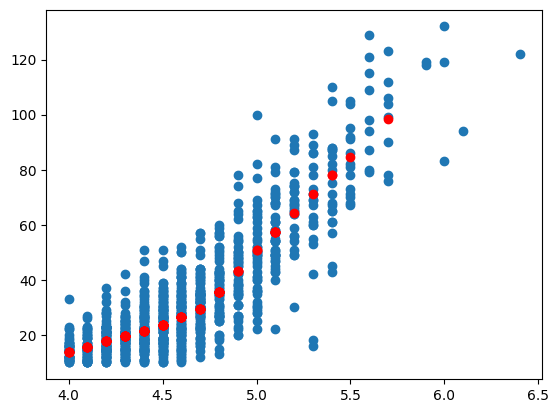

In [31]:
plt.scatter(df['mag'],df['stations'])
plt.scatter(mags_test,predictions,color='red')